# PART 03. 통계분석

## 6장. 회귀분석

In [42]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 통계 학습을 위한 패키지
import scipy as sp
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 기계 학습을 위한 패키지
import sklearn.linear_model
from sklearn.model_selection import train_test_split    # training/test data set을 추출하는 패키지
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 시각화를 위한 패키지
import seaborn as sb
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm

# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.
%matplotlib inline

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

### 2) 단순선형회귀분석

#### 데이터 파악 및 전처리

In [2]:
# 데이터프레임 생성

df_cars93 = pd.read_csv( 'C:/Users/Administrator/GitHub/TIL/ADP_study/rawdata/Cars93.csv',
                      index_col = 'Unnamed: 0' )
df_cars93

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,Front,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,Front,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,Front,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


##### 결측치 확인

In [3]:
df_cars93.isnull().sum()

Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

##### 탐색적 데이터 분석 (EDA; Exploratory Data Analysis)

In [4]:
df_cars93.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

##### 기술통계 살펴보기

In [5]:
# 중간값, 결측치, 왜도, 첨도 표시

df_stats = df_cars93.describe().T
df_stats

skew_results = []
kurtosis_results = []
null_results = []
median_results = []

# enumerate() 함수를 사용하여 인덱스와 데이터값을 쌍으로 사용하여 반복문 실행
for idx, val in enumerate( df_stats.index ):
    median_results.append( df_cars93[val].median() )
    skew_results.append( df_cars93[val].skew() )
    kurtosis_results.append( df_cars93[val].kurtosis() )
    null_results.append( df_cars93[val].isnull().sum() )  

df_stats['median'] = median_results
df_stats['missing'] = null_results
df_stats['skewness'] = skew_results
df_stats['kurtosis'] = kurtosis_results
df_stats

,count,mean,std,min,25%,50%,75%,max,median,missing,skewness,kurtosis
Min.Price,93.0,17.125806,8.746029,6.7,10.8,14.7,20.3,45.4,14.7,0,1.182989,1.019419
Price,93.0,19.509677,9.659430,7.4,12.2,17.7,23.3,61.9,17.7,0,1.533082,3.429123
Max.Price,93.0,21.898925,11.030457,7.9,14.7,19.6,25.3,80.0,19.6,0,2.033859,7.439426
MPG.city,93.0,22.365591,5.619812,15.0,18.0,21.0,25.0,46.0,21.0,0,1.704430,4.004306
MPG.highway,93.0,29.086022,5.331726,20.0,26.0,28.0,31.0,50.0,28.0,0,1.229897,2.614201
EngineSize,93.0,2.667742,1.037363,1.0,1.8,2.4,3.3,5.7,2.4,0,0.859418,0.381025
Horsepower,93.0,143.827957,52.374410,55.0,103.0,140.0,170.0,300.0,140.0,0,0.951728,1.110883
RPM,93.0,5280.645161,596.731690,3800.0,4800.0,5200.0,5750.0,6500.0,5200.0,0,-0.258533,-0.409479
Rev.per.mile,93.0,2332.204301,496.506525,1320.0,1985.0,2340.0,2565.0,3755.0,2340.0,0,0.281546,0.220544
Fuel.tank.capacity,93.0,16.664516,3.279370,9.2,14.5,16.4,18.8,27.0,16.4,0,0.108146,0.127206


##### 종속변수(price)의 데이터 분포도 확인

<AxesSubplot:>

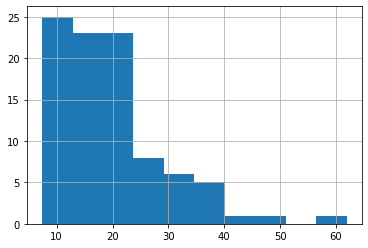

In [6]:
df_cars93['Price'].hist()

<AxesSubplot:>

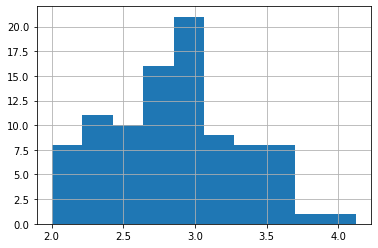

In [7]:
# 자연로그를 취해서 종속변수(Price)의 분포가 정규분포 형태를 띄는지 확인 --> 선형 회귀분석 시 자연로그 적용
np.log(df_cars93['Price']).hist()

In [8]:
np.log(df_cars93['Price']).skew()

0.2613736711371087

##### 데이터 타입 분류 - 데이터 전처리 필요 여부 확인

In [9]:
def separate_dtype(df):
    df_obj = df_cars93.select_dtypes(include=['object'])
    df_numr = df_cars93.select_dtypes(include=['int64', 'float64'])
    return [df_obj, df_numr]

(df_obj, df_numr) = separate_dtype(df_cars93)

In [10]:
df_numr.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
1,12.9,15.9,18.8,25,31,1.8,140,6300,2890,13.2,5,177,102,68,37,26.5,11.0,2705
2,29.2,33.9,38.7,18,25,3.2,200,5500,2335,18.0,5,195,115,71,38,30.0,15.0,3560
3,25.9,29.1,32.3,20,26,2.8,172,5500,2280,16.9,5,180,102,67,37,28.0,14.0,3375
4,30.8,37.7,44.6,19,26,2.8,172,5500,2535,21.1,6,193,106,70,37,31.0,17.0,3405
5,23.7,30.0,36.2,22,30,3.5,208,5700,2545,21.1,4,186,109,69,39,27.0,13.0,3640


In [11]:
df_obj.head()

,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin,Make
1,Acura,Integra,Small,None,Front,4,Yes,non-USA,Acura Integra
2,Acura,Legend,Midsize,Driver & Passenger,Front,6,Yes,non-USA,Acura Legend
3,Audi,90,Compact,Driver only,Front,6,Yes,non-USA,Audi 90
4,Audi,100,Midsize,Driver & Passenger,Front,6,Yes,non-USA,Audi 100
5,BMW,535i,Midsize,Driver only,Rear,4,Yes,non-USA,BMW 535i


#### 시각화

##### 히스토그램(Histogram)
- 각각의 독립변수 데이터의 분포를 확인

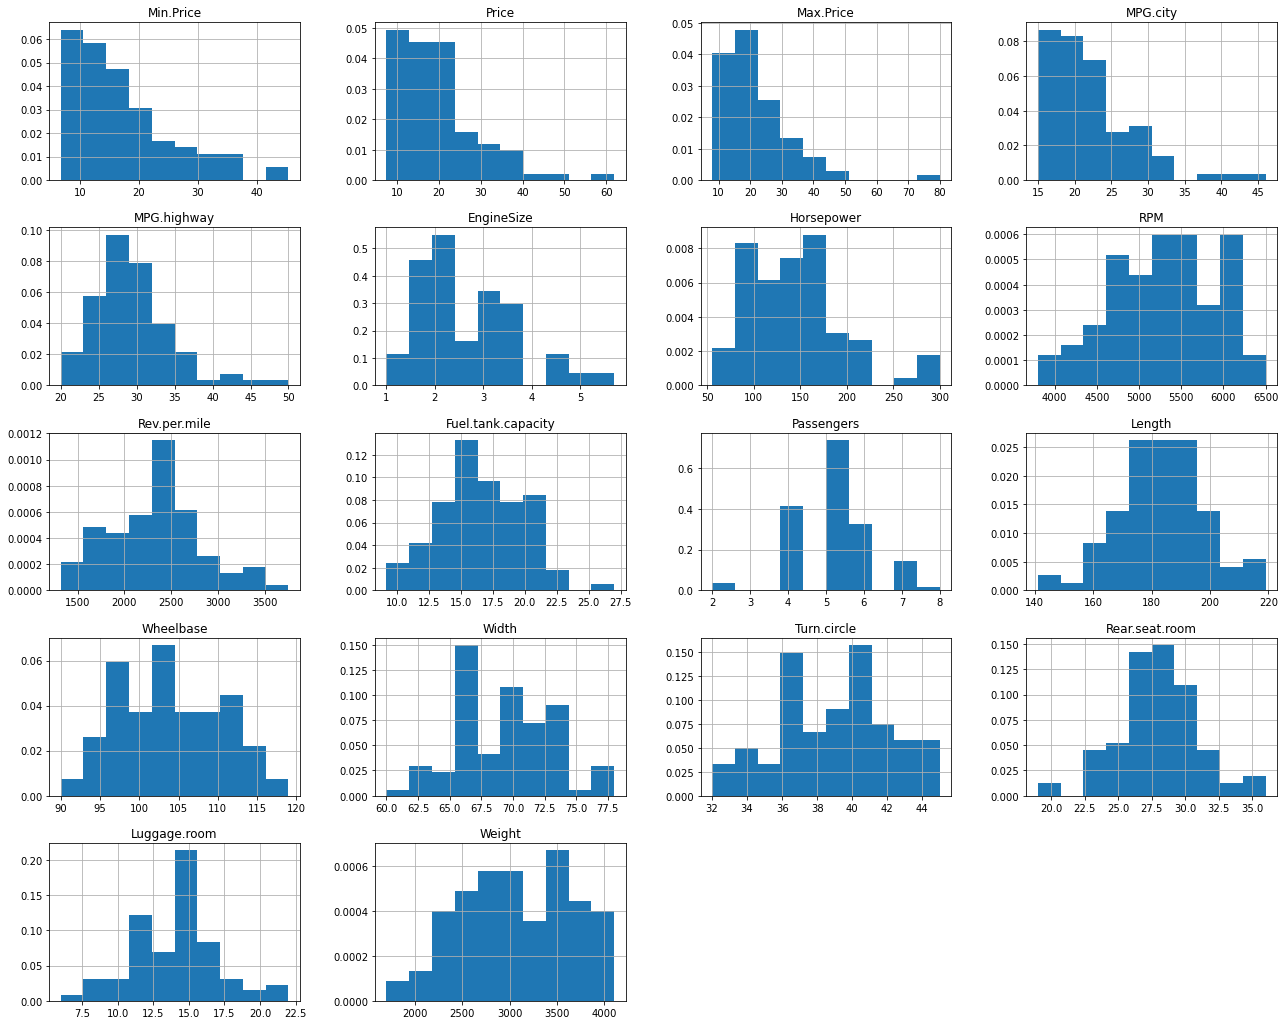

In [12]:
df_cars93.hist(figsize=(22,18), density=True)
plt.show()

##### 산점도(Scatter plot)
- 종속변수(price)와 선형관계가 있을 것 같은 독립변수들을 몇개 추려서 산점도 그래프를 출력

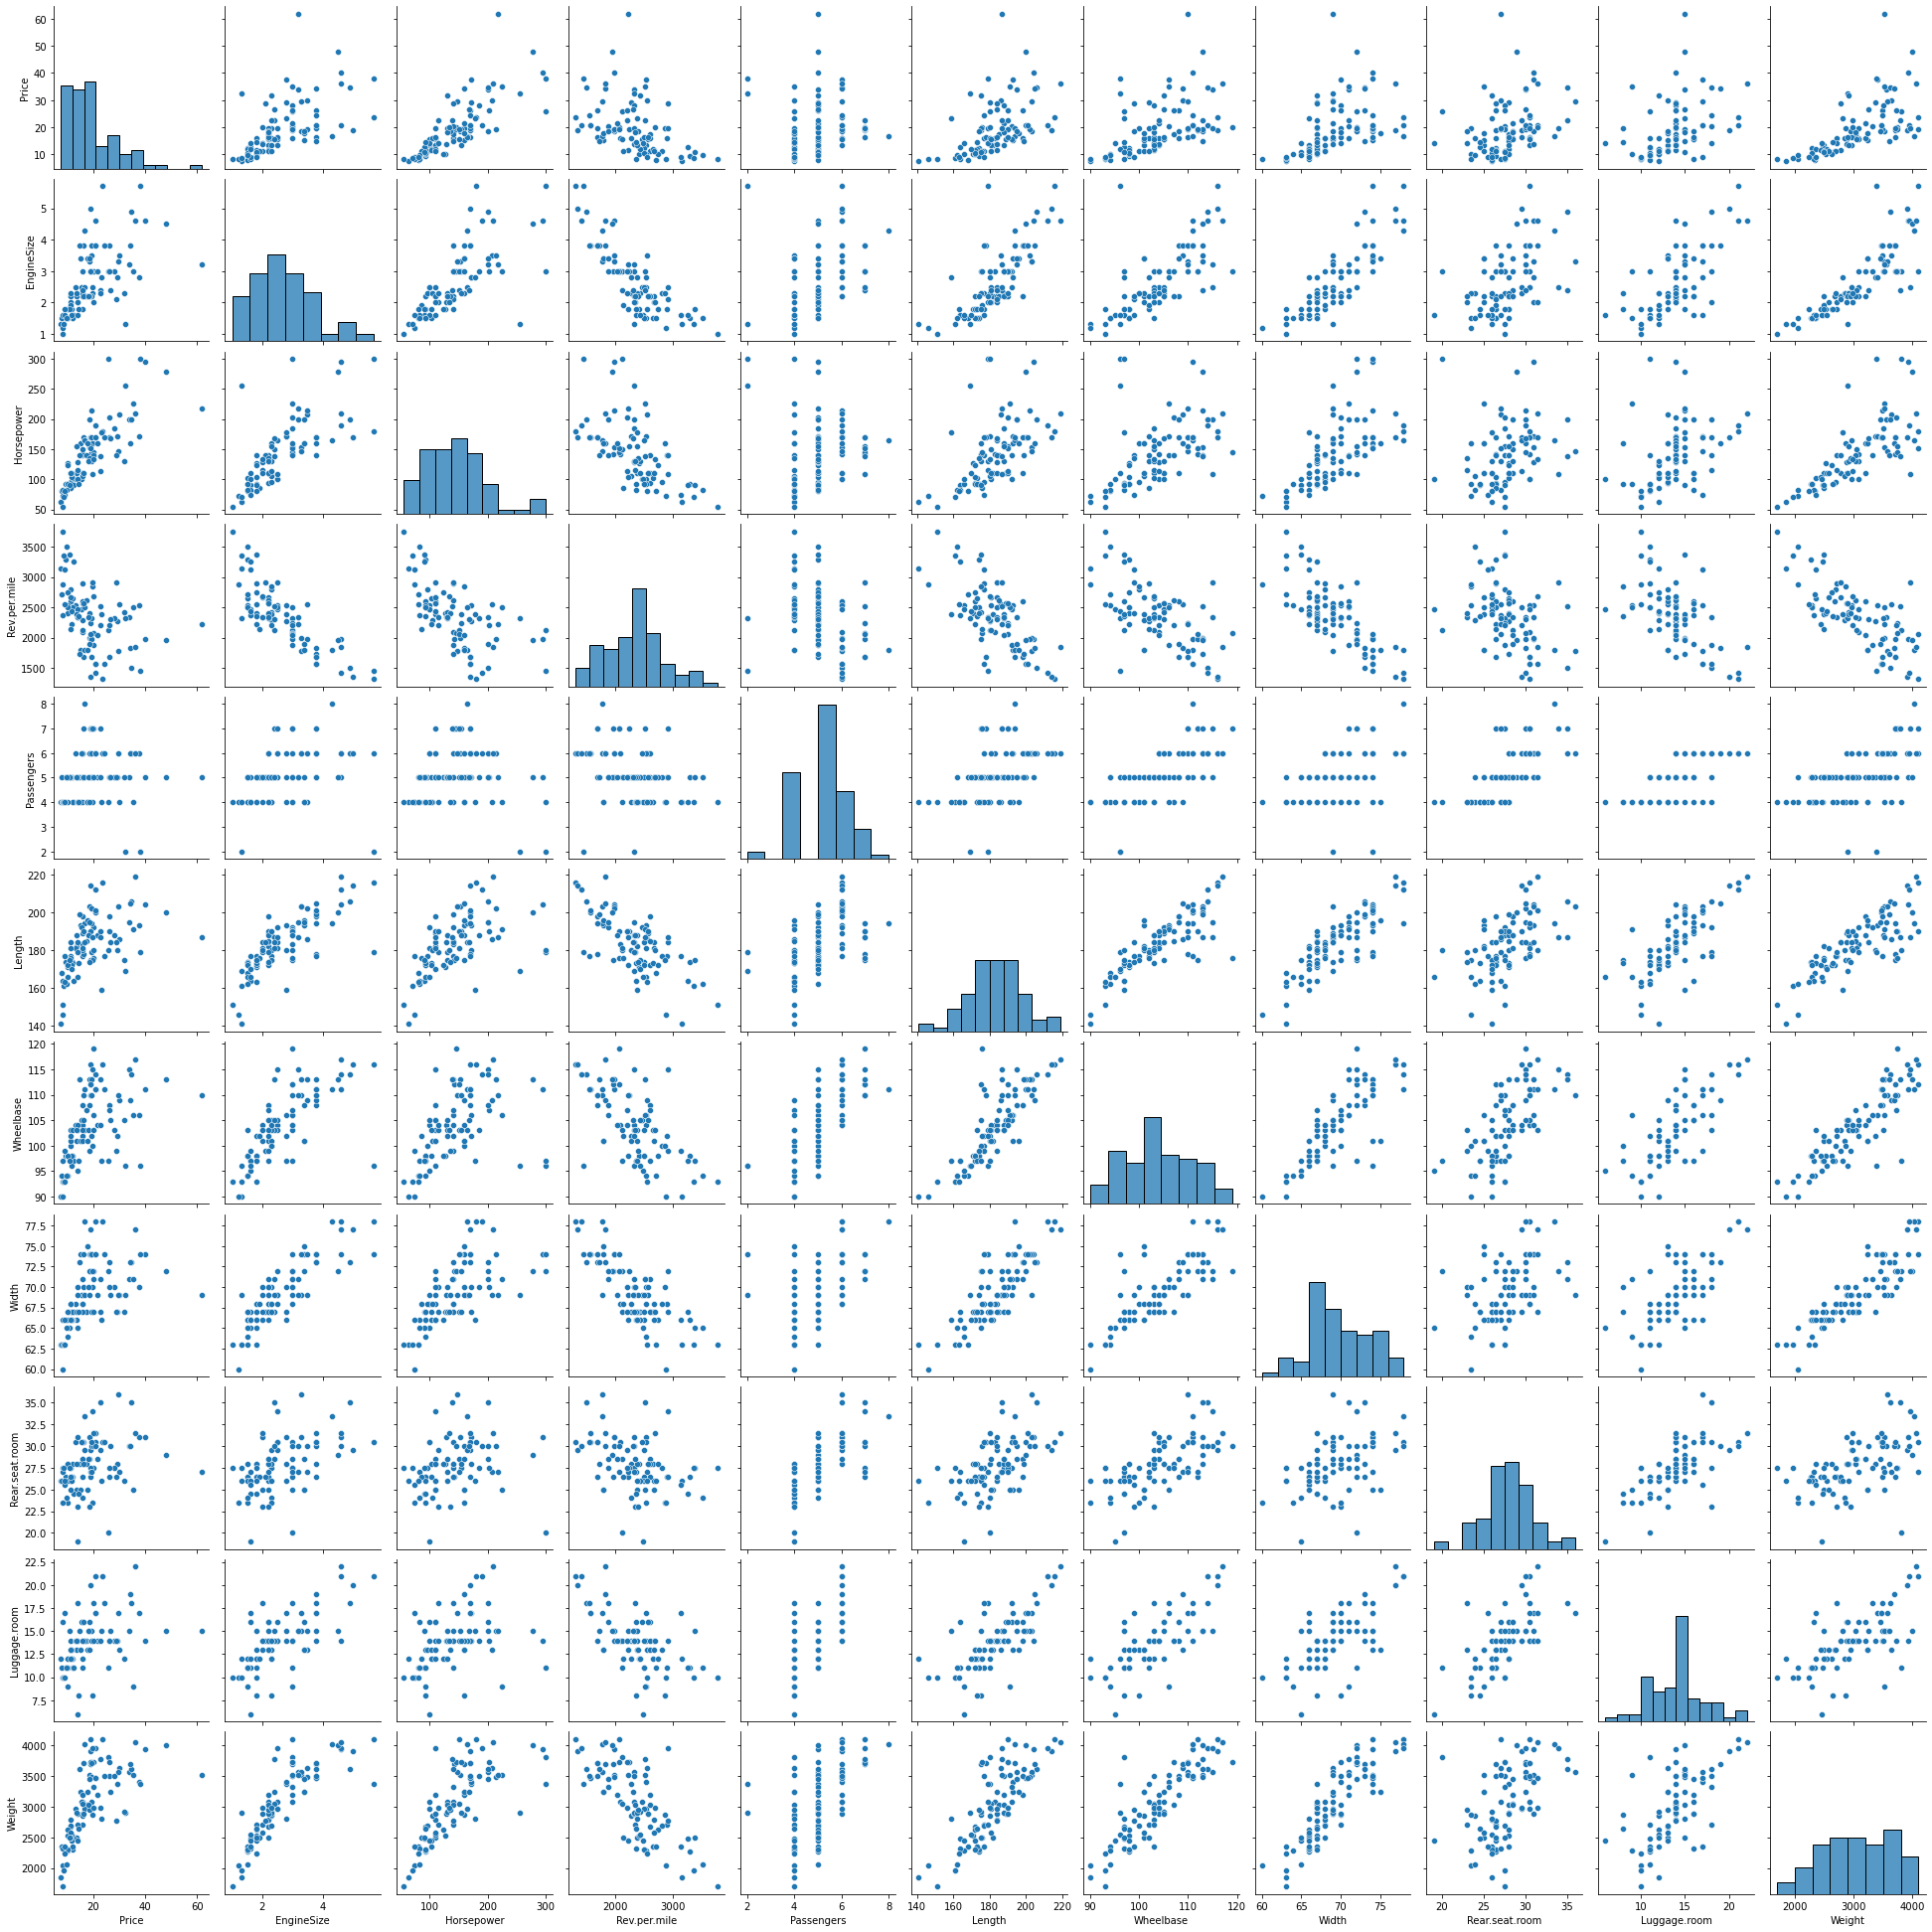

In [13]:
df_pairplot = df_cars93[['Price', 'EngineSize', 'Horsepower', 'Rev.per.mile', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Rear.seat.room', 'Luggage.room', 'Weight']]

sb.pairplot(df_pairplot)
plt.show()

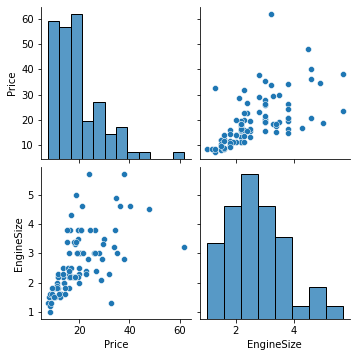

In [14]:
df_pairplot = df_cars93[['Price', 'EngineSize']]

sb.pairplot(df_pairplot)
plt.show()

##### 히트맵(Heatmap) - 상관관계 분석

<AxesSubplot:>

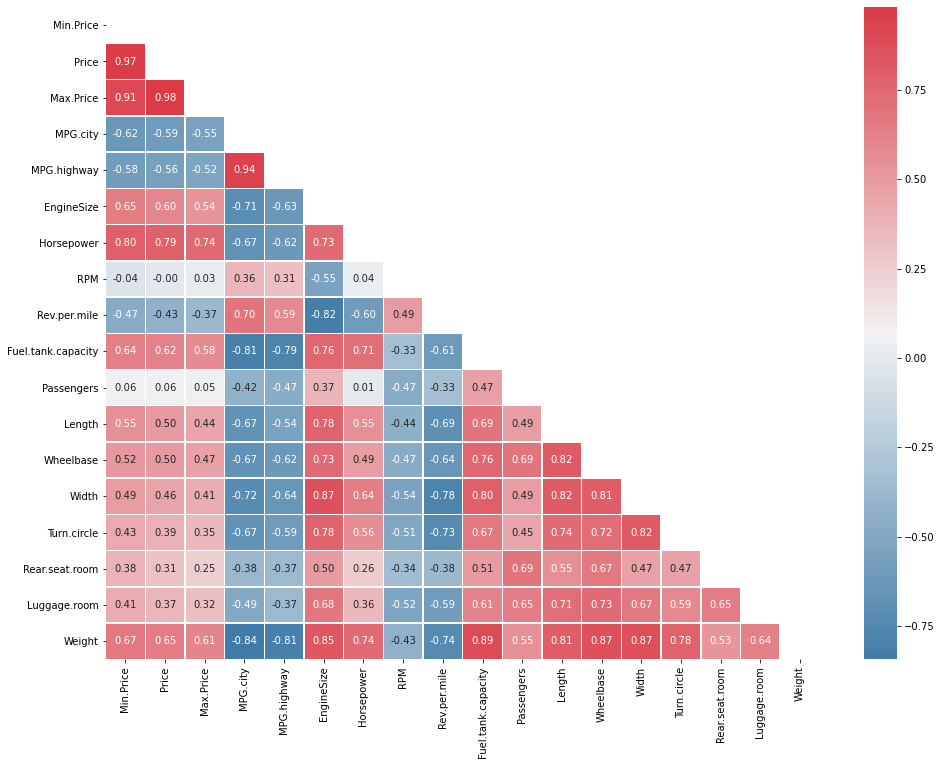

In [15]:
# 반대쪽 삼각형은 안보이게 설정
# fmt = 실제 값 표시 .2f 소수점 2째 자리

df_corr = df_cars93.corr()
cmap = sb.diverging_palette(240, 10, n=9, as_cmap=True)

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(16,12))

sb.heatmap(df_cars93.corr(), annot=True, mask=mask, cmap=cmap, linewidths=.5, fmt = '.2f', annot_kws={"size":10})

In [16]:
# price와 상관관계가 높은 독립변수 선택

df_corr.sort_values(by='Price', ascending=False)[['Price']]

,Price
Price,1.000000
Max.Price,0.981580
Min.Price,0.970601
Horsepower,0.788218
Weight,0.647179
Fuel.tank.capacity,0.619480
EngineSize,0.597425
Length,0.503628
Wheelbase,0.500864
Width,0.456028


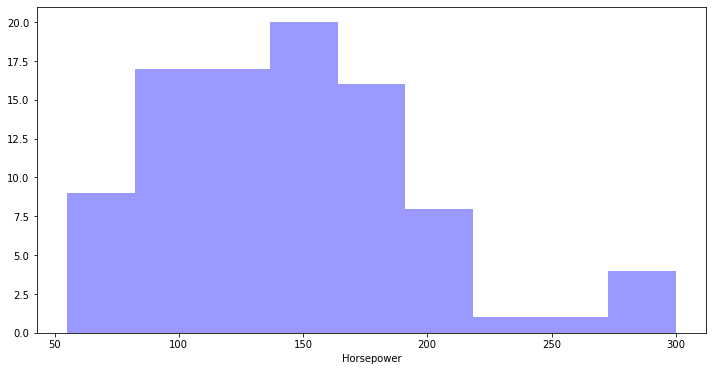

In [20]:
plt.figure(figsize=(12,6))
ax1 = sb.distplot(df_cars93['Horsepower'], hist=True, norm_hist=False, kde=False, label="Horsepower", color = 'blue')

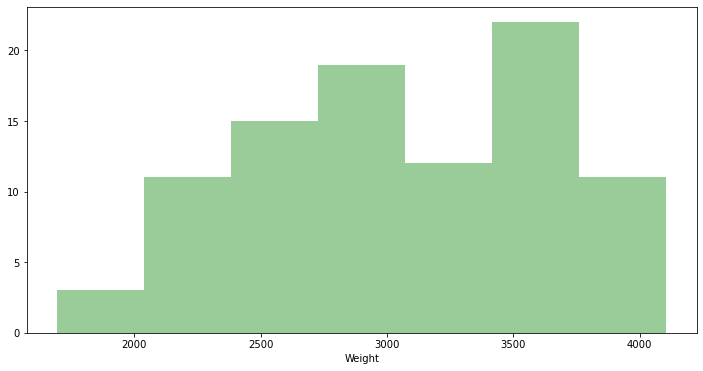

In [21]:
plt.figure(figsize=(12,6))
ax2 = sb.distplot(df_cars93['Weight'], hist=True, norm_hist=False, kde=False, label="Weight", color = 'green')

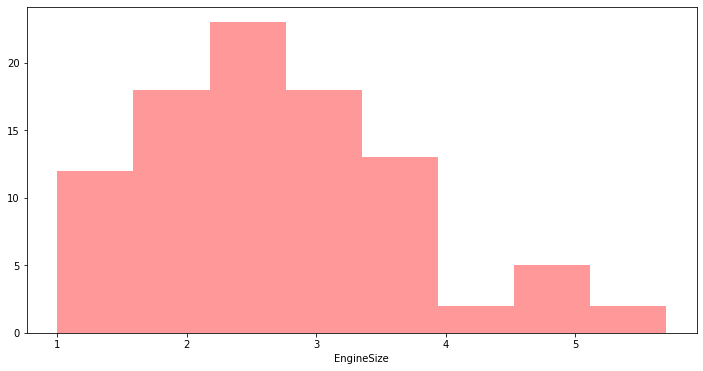

In [22]:
plt.figure(figsize=(12,6))
ax3 = sb.distplot(df_cars93['EngineSize'], hist=True, norm_hist=False, kde=False, label="EngineSize", color = 'red')

#### Regression 실시
- 독립변수(X): EngineSize
- 종속변수(y): Price

##### 시각화

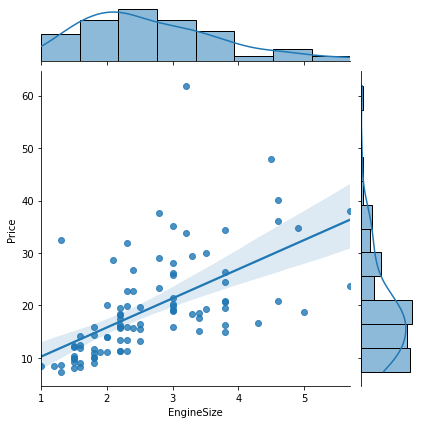

In [23]:
sb.jointplot(x='EngineSize', y='Price', data=df_cars93, kind='reg')
plt.show()

##### OLS model fit

In [25]:
X = df_cars93[['EngineSize']]
y = df_cars93[['Price']]

# 상수항 추가하기 
X = sm.add_constant(X, has_constant="add")
X.head()

,const,EngineSize
1,1.0,1.8
2,1.0,3.2
3,1.0,2.8
4,1.0,2.8
5,1.0,3.5


In [43]:
# 모델 fit
model = sm.OLS(y, X)

result_model = model.fit()
print(result_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     50.51
Date:                Thu, 15 Jul 2021   Prob (F-statistic):           2.59e-10
Time:                        23:21:21   Log-Likelihood:                -321.85
No. Observations:                  93   AIC:                             647.7
Df Residuals:                      91   BIC:                             652.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6692      2.239      2.085      0.0

In [41]:
model

##### 잔차 확인
- 잔차(residual): 실제 타겟값과 모델을 통해 추정한 값의 차이

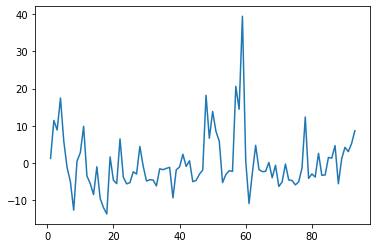

In [40]:
# 잔차 확인
result_model.resid.plot()
plt.show()